# Introducción a la regresión logística

In [1]:
#Importamos las librerías que necesitamos
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Definimos nuestro mundo de datos
m=40
x_maligno=np.random.uniform(low=4, high=13, size=m//2)
y_maligno=np.ones(m//2)
x_benigno=np.random.uniform(low=0, high=6, size=m//2)
y_benigno=np.zeros(m//2)
x_tumor=np.concatenate((x_benigno,x_maligno)).reshape(-1,1)
y_tumor=np.concatenate((y_benigno,y_maligno))

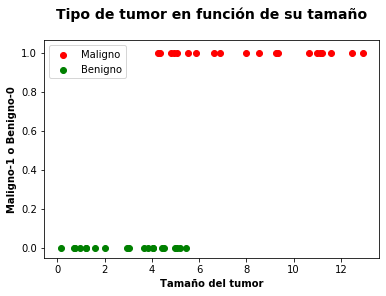

In [3]:
#Los graficamos
#Vamos a ver que hay una ligera superposición en los datos
plt.scatter(x_maligno,y_maligno,c='r',label='Maligno')
plt.scatter(x_benigno,y_benigno,c='g',label='Benigno')
plt.xlabel('Tamaño del tumor',fontweight='bold')
plt.ylabel('Maligno-1 o Benigno-0',fontweight='bold')
plt.title('Tipo de tumor en función de su tamaño\n', fontsize=14, fontweight='bold')
plt.legend()

In [4]:
#Creamos nuestra primera función
def miPrimerFuncion(a,b):
    return a+b,a-b

In [5]:
a,b=miPrimerFuncion(2,8)

In [6]:
a

10

In [7]:
b

-6

In [8]:
#Definamos la función de Logística
def logistica(x,a=1,b=0):
    return 1/(1+np.exp(-(a*x+b)))

In [9]:
logistica(-9999)

/Users/adambrosio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.0

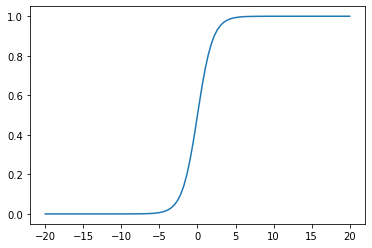

In [10]:
#Grafico una función logistica
x=np.linspace(-20, 20, num=100)
y=logistica(x)
plt.plot(x,y)

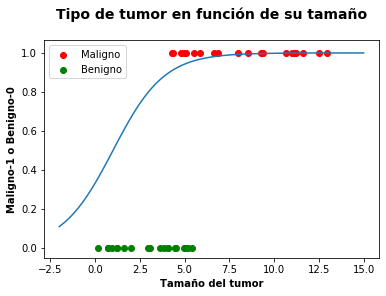

In [11]:
#Grafico los datos con la función logística encima
plt.scatter(x_maligno,y_maligno,c='r',label='Maligno')
plt.scatter(x_benigno,y_benigno,c='g',label='Benigno')
plt.xlabel('Tamaño del tumor',fontweight='bold')
plt.ylabel('Maligno-1 o Benigno-0',fontweight='bold')
plt.title('Tipo de tumor en función de su tamaño\n', fontsize=14, fontweight='bold')
plt.legend()
x=np.linspace(-2, 15, num=100)
y=logistica(x,a=0.7,b=-0.7)
plt.plot(x,y)

In [12]:
#Cómo corremos la función hacia la derecha?
#Cómo hacemos para hacerla más abrupta?

In [13]:
x_tumor.shape

(40, 1)

In [14]:
y_tumor.shape

(40,)

In [15]:
np.sum(np.dot(x_tumor.T,(logistica(x_tumor,a,b)-y_tumor.reshape(m,1))))

59.28324246191709

In [16]:
#a=1
#b=0
niter=400
alpha=0.02
for i in range(niter):
    a=a-alpha*np.dot(x_tumor.T,(logistica(x_tumor,a,b)-y_tumor.reshape(m,1)))
    a=np.sum(a)
    b=b-alpha*np.sum(logistica(x_tumor,a,b)-y_tumor.reshape(m,1))

In [17]:
print(a,b)

1.6531312563945761 -8.207530947904074


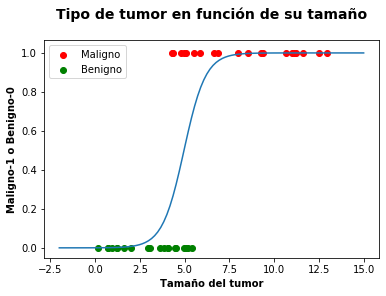

In [18]:
#Grafico los datos con la función logística encima
plt.scatter(x_maligno,y_maligno,c='r',label='Maligno')
plt.scatter(x_benigno,y_benigno,c='g',label='Benigno')
plt.xlabel('Tamaño del tumor',fontweight='bold')
plt.ylabel('Maligno-1 o Benigno-0',fontweight='bold')
plt.title('Tipo de tumor en función de su tamaño\n', fontsize=14, fontweight='bold')
plt.legend()
x=np.linspace(-2, 15, num=100)
y=logistica(x,a,b)
plt.plot(x,y)

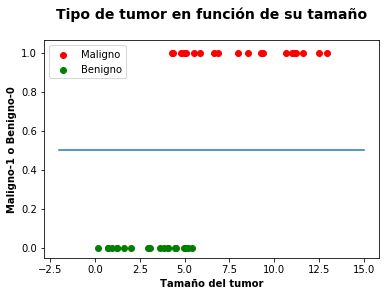

In [19]:
a=0
b=0

#Grafico los datos con la función logística encima
plt.scatter(x_maligno,y_maligno,c='r',label='Maligno')
plt.scatter(x_benigno,y_benigno,c='g',label='Benigno')
plt.xlabel('Tamaño del tumor',fontweight='bold')
plt.ylabel('Maligno-1 o Benigno-0',fontweight='bold')
plt.title('Tipo de tumor en función de su tamaño\n', fontsize=14, fontweight='bold')
plt.legend()
x=np.linspace(-2, 15, num=100)
y=logistica(x,a,b)
plt.plot(x,y)

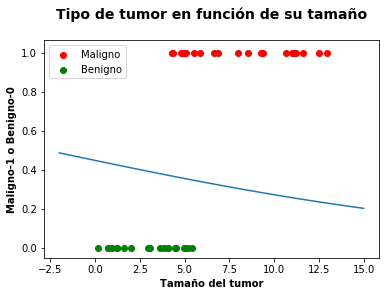

In [24]:
alpha=0.02
for i in range(2):
    a=a-alpha*np.dot(x_tumor.T,(logistica(x_tumor,a,b)-y_tumor.reshape(m,1)))
    a=np.sum(a)
    b=b-alpha*np.sum(logistica(x_tumor,a,b)-y_tumor.reshape(m,1))
    
#Grafico los datos con la función logística encima
plt.scatter(x_maligno,y_maligno,c='r',label='Maligno')
plt.scatter(x_benigno,y_benigno,c='g',label='Benigno')
plt.xlabel('Tamaño del tumor',fontweight='bold')
plt.ylabel('Maligno-1 o Benigno-0',fontweight='bold')
plt.title('Tipo de tumor en función de su tamaño\n', fontsize=14, fontweight='bold')
plt.legend()
x=np.linspace(-2, 15, num=100)
y=logistica(x,a,b)
plt.plot(x,y)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [26]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

In [27]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
logreg = LogisticRegression()

In [29]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

LogisticRegression()

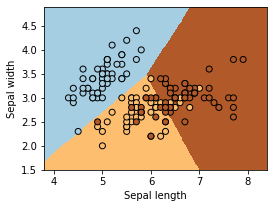

In [30]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

In [ ]:
logreg.predict(np.array([[10,4]]))